In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense        




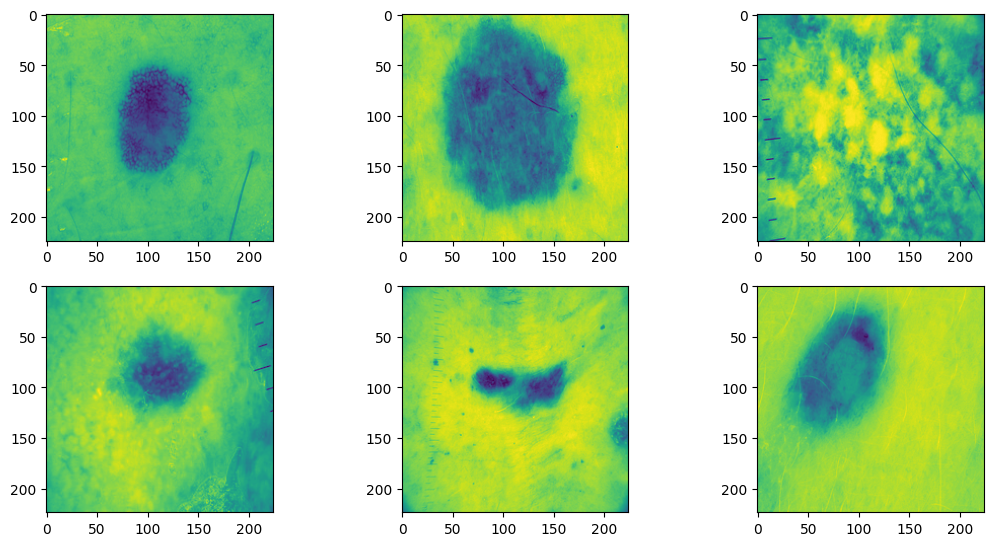

In [3]:

fig = plt.figure(figsize=(13, 10))

path = r'data/train/benign/100.jpg'
Image1 = cv2.imread(path,0)
path_1 = r'data/train/benign/1021.jpg'
Image2 = cv2.imread(path_1,0)

path_2 = r'data/train/malignant/19.jpg'
Image3 = cv2.imread(path_2,0)

path_3 = r'data/train/malignant/55.jpg'
Image4 = cv2.imread(path_3,0)

path_4 = r'data/test/benign/105.jpg'
Image5 = cv2.imread(path_4,0)

path_5 = r'data/test/benign/259.jpg'
Image6 = cv2.imread(path_5,0)


fig.add_subplot(3,3,1)
plt.imshow(Image1)
fig.add_subplot(3,3,2)
plt.imshow(Image2)
fig.add_subplot(3,3,3)
plt.imshow(Image3)
fig.add_subplot(3,3,4)
plt.imshow(Image4)
fig.add_subplot(3,3,5)
plt.imshow(Image5)
fig.add_subplot(3,3,6)
plt.imshow(Image6)


In [4]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)


train='data/train/'

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=35,
    subset='training',
    seed=50 )




Found 2637 files belonging to 2 classes.
Using 1978 files for training.


In [5]:
val='data/train/'


val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=35,
    subset='validation',
    seed=50
    )



Found 2637 files belonging to 2 classes.
Using 659 files for validation.


In [6]:
test='data/test/'


test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=35,
    seed=50
    )



Found 660 files belonging to 2 classes.


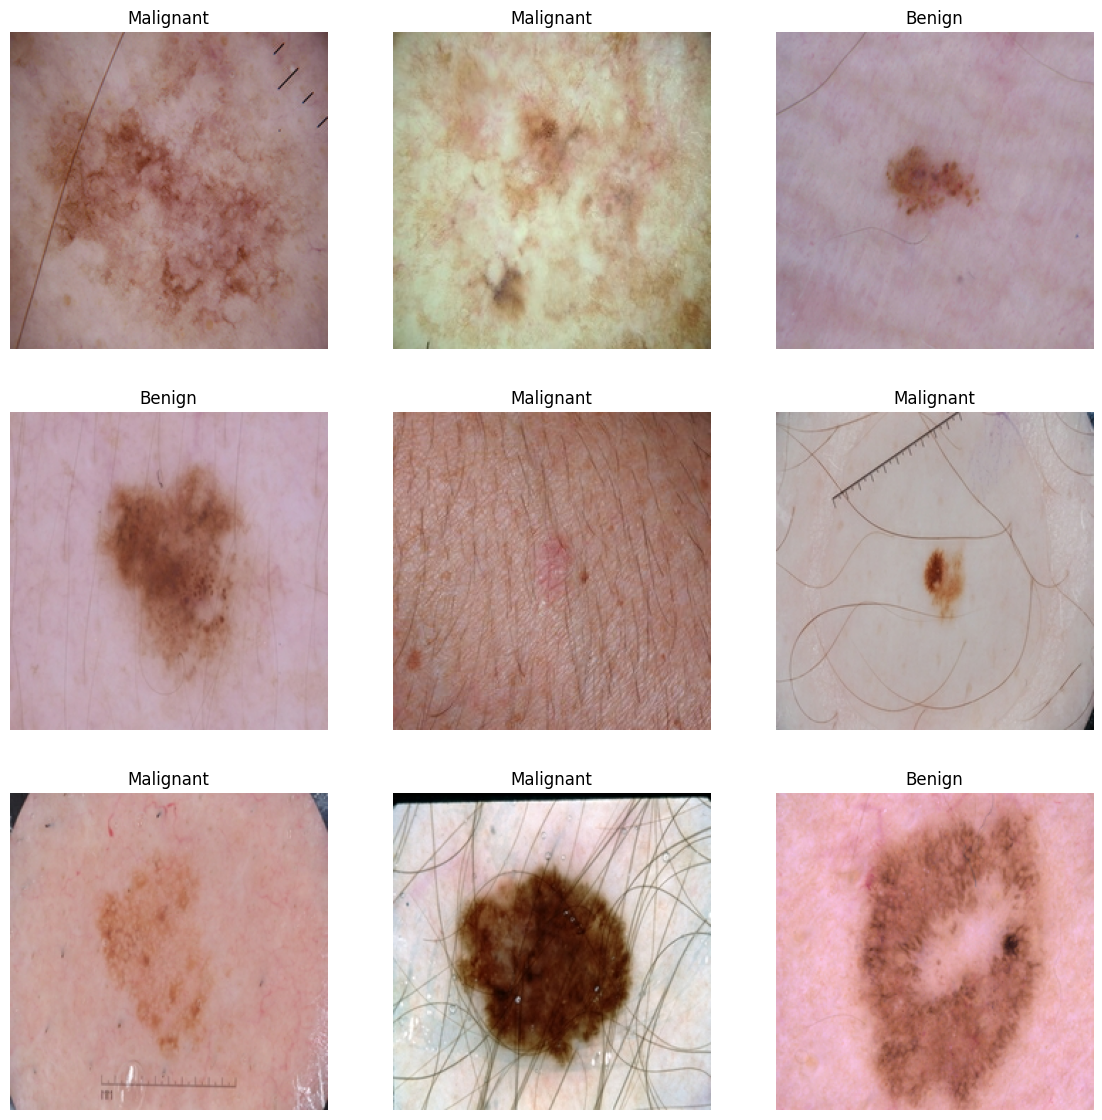

In [7]:

class_names = ['Benign', 'Malignant']

train_data.class_names = class_names
val_data.class_names = class_names

plt.figure(figsize=(14, 14))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")






In [8]:
model=Sequential()


#CNN Layer
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(2, activation='softmax'))


model.summary()




C:\Users\Danat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             402 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,280 (188.59 KB)

 Trainable params: 48,280 (188.59 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])




In [10]:
samples=2637
batch_size=35
new_values= samples//batch_size
value=print(new_values)
history = model.fit(
          train_data,
          steps_per_epoch = value,
          epochs=20,
          validation_data=val_data,
                             )





75
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 769ms/step - accuracy: 0.5430 - loss: 0.6966 - val_accuracy: 0.5463 - val_loss: 0.9388
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 585ms/step - accuracy: 0.6012 - loss: 0.6844 - val_accuracy: 0.5660 - val_loss: 0.7002
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 591ms/step - accuracy: 0.6616 - loss: 0.6245 - val_accuracy: 0.7238 - val_loss: 0.5355
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 533ms/step - accuracy: 0.7491 - loss: 0.5146 - val_accuracy: 0.7724 - val_loss: 0.4917
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 540ms/step - accuracy: 0.7961 - loss: 0.4615 - val_accuracy: 0.7739 - val_loss: 0.5102
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 535ms/step - accuracy: 0.7718 - loss: 0.4845 - val_accuracy: 0.7876 - val_loss: 0.4532
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 576ms/step - accuracy: 0.7874 - loss: 0.4398 - val_accuracy: 0.7967 - val_loss: 0.4258
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 517ms/step - accuracy: 0.8000 - loss: 0.4383 - val_a

In [11]:
model.evaluate(val_data)

model.evaluate(test_data)

model.save("cnn_model_skin1.h5")



19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.8255 - loss: 0.4229
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.8026 - loss: 0.3937


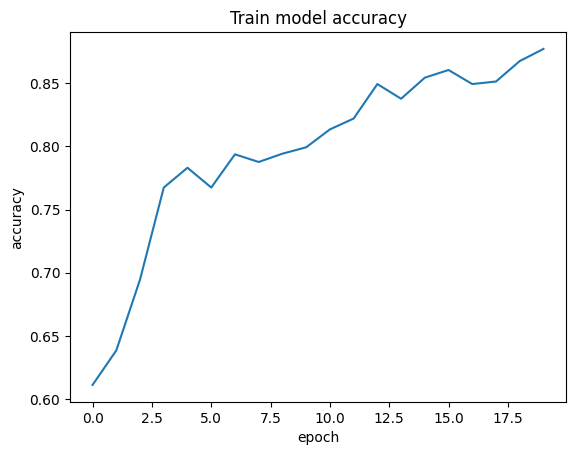

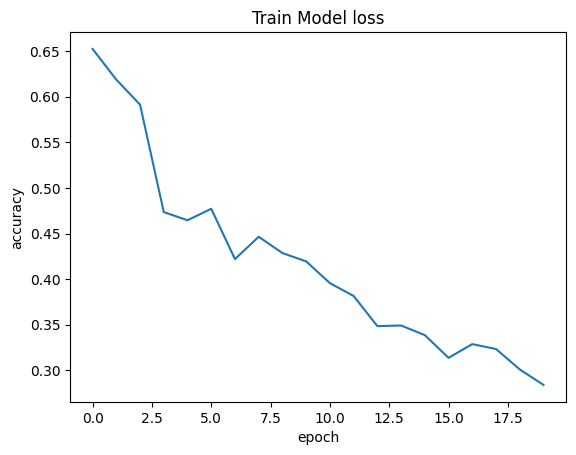

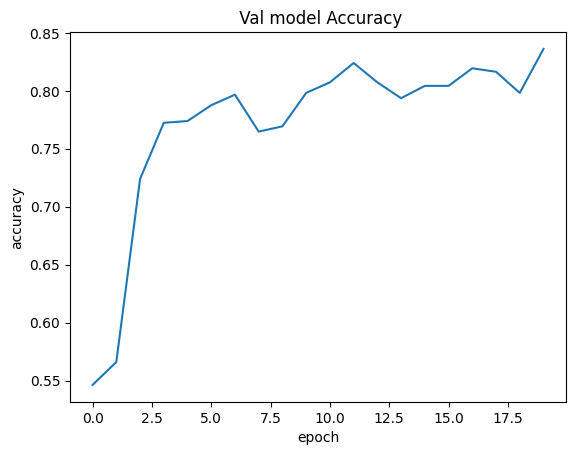

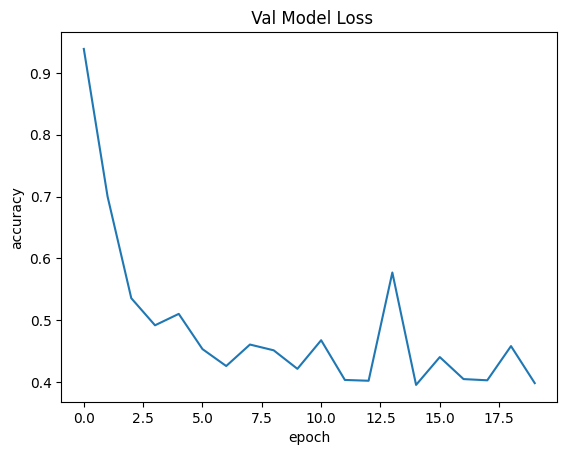

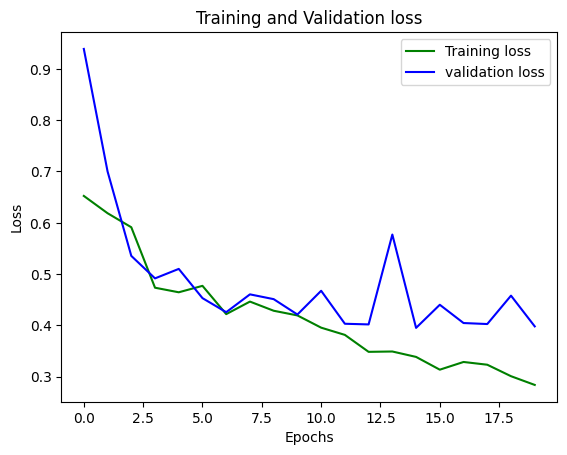

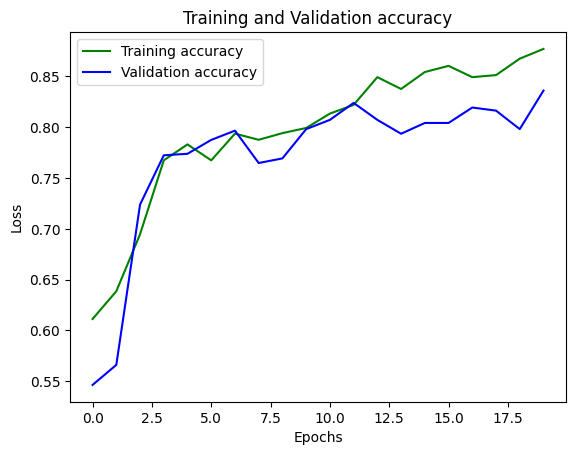

In [12]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


['dummy\\30.jpg', 'dummy\\37.jpg', 'dummy\\5.jpg', 'dummy\\84.jpg', 'dummy\\95.jpg']


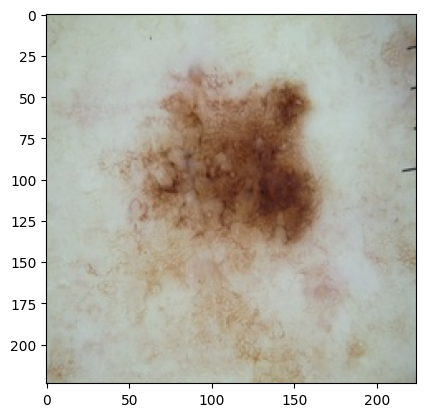

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
--------------Malignant-------------





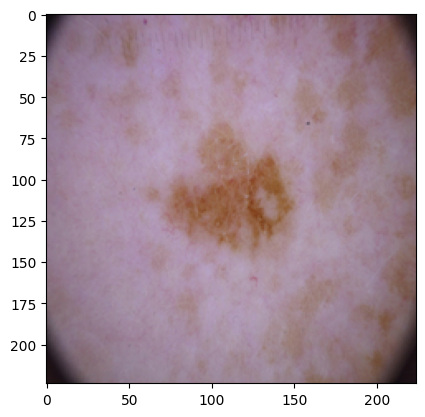

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
--------------Malignant-------------





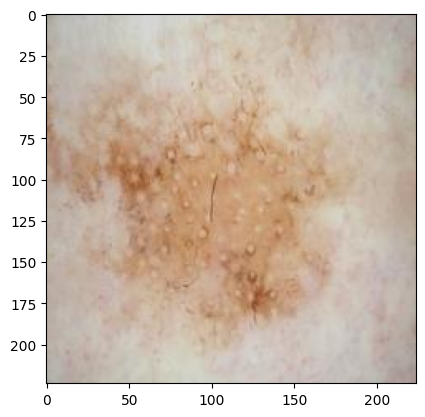

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
--------------Malignant-------------





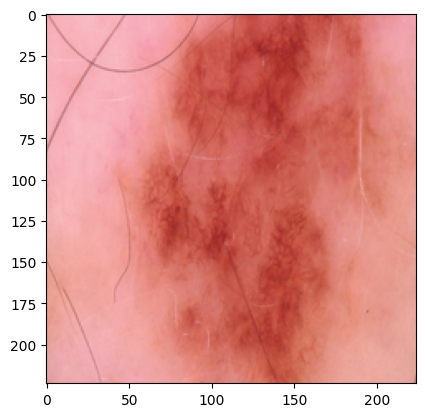

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
---------------Benign---------------





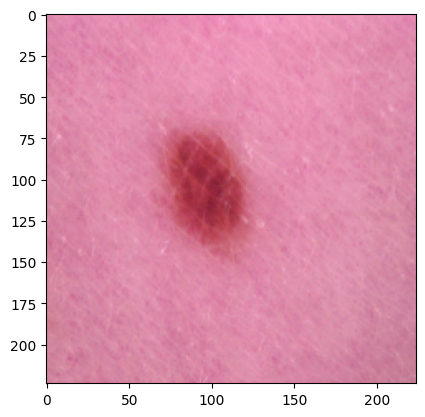

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
---------------Benign---------------



True_class: Benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
Predicted Image: Malignant
Predicted class: 1
 
True_class: Malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Image: Benign
Predicted class: 0
 
True_class: Benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Image: Benign
Predicted class: 0
 
True_class: Malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Image: Malignant
Predicted class: 1
 
True_class: Malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Image: Malignant
Predicted class: 1
 
True_class: Benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Image: Benign
Predicted class: 0
 


In [13]:


from tensorflow.keras.models import load_model       
prediction=tf.keras.models.load_model("cnn_model_skin1.h5")


import glob
import cv2


path = glob.glob("dummy/*.jpg")
print(path)


list=[]


for file in path:
    photo=cv2.imread(file)
    list.append(photo)


from tensorflow.keras.preprocessing import image   


dir_path="dummy/"

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+ i)
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    p=np.argmax(prediction.predict(x))
    if p==0:
        print("---------------Benign---------------\n\n\n")
    elif p==1:
        print("--------------Malignant-------------\n\n\n")


class_names={0:"Benign", 1:"Malignant"}    
for images, labels in test_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Benign")
        else:
            print("Predicted Image: Malignant")
        
        print("Predicted class:",p)
        print(" ")    